In [1]:
import pandas as pd
import numpy as np
from mqt.predictor import rl
df = pd.read_csv(rl.helper.get_path_trained_model() / 'res.csv', sep=',')

In [2]:
df["x_data"]=(df["Benchmark"]+ "_"+ df["Qubits"].astype(str)).astype("category")
df.sort_values(by=["Benchmark", "Qubits"], inplace=True)

In [3]:
df["RL-Qiskit Fid"]=df["RL Fid"]-df["Qiskit O3 Fid"]
df["RL-TKET Fid"]=df["RL Fid"]-df["TKET Fid"]
df["RL-Qiskit Crit Depth"]=df["RL Crit Depth"]-df["Qiskit O3 Crit Depth"]
df["RL-TKET Crit Depth"]=df["RL Crit Depth"]-df["TKET Crit Depth"]
df["RL-Qiskit Parallelism"]=df["RL Parallelism"]-df["Qiskit O3 Parallelism"]
df["RL-TKET Parallelism"]=df["RL Parallelism"]-df["TKET Parallelism"]

In [4]:
color_qiskit = "#994F00"
color_TKET = "#006CD1"
size = 14
legendsize = 12
max_val_bench = max([df.groupby(["Benchmark"])["RL-Qiskit Fid"].mean().max(), 
                     df.groupby(["Benchmark"])["RL-TKET Fid"].mean().max(), 
                     df.groupby(["Benchmark"])["RL-Qiskit Crit Depth"].mean().max(), 
                     df.groupby(["Benchmark"])["RL-TKET Crit Depth"].mean().max(),
                     df.groupby(["Benchmark"])["RL-Qiskit Parallelism"].mean().max(), 
                     df.groupby(["Benchmark"])["RL-TKET Parallelism"].mean().max()])
min_value_bench = min(df.groupby(["Benchmark"])["RL-Qiskit Fid"].mean().min(),
                      df.groupby(["Benchmark"])["RL-TKET Fid"].mean().min(), 
                      df.groupby(["Benchmark"])["RL-Qiskit Crit Depth"].mean().min(), 
                      df.groupby(["Benchmark"])["RL-TKET Crit Depth"].mean().min(), 
                      df.groupby(["Benchmark"])["RL-Qiskit Parallelism"].mean().min(), 
                      df.groupby(["Benchmark"])["RL-TKET Parallelism"].mean().min())

In [5]:
df["RL-Qiskit Fid"][df["RL-Qiskit Fid"] > 0.0 ].count()/len(df)

0.705

In [6]:
df["RL-TKET Fid"][df["RL-TKET Fid"] > 0.0 ].count()/len(df)

0.75

In [7]:
df["RL-Qiskit Parallelism"][df["RL-Qiskit Parallelism"] > 0.0 ].count()/len(df)

0.585

In [8]:
df["RL-TKET Parallelism"][df["RL-TKET Parallelism"] > 0.0 ].count()/len(df)

0.565

In [9]:
df["RL-Qiskit Crit Depth"][df["RL-Qiskit Crit Depth"] > 0.0 ].count()/len(df)

0.865

In [10]:
df["RL-TKET Crit Depth"][df["RL-TKET Crit Depth"] > 0.0 ].count()/len(df)

0.875

In [11]:
print(min_value_bench, max_val_bench)

-0.06999999999999995 0.55


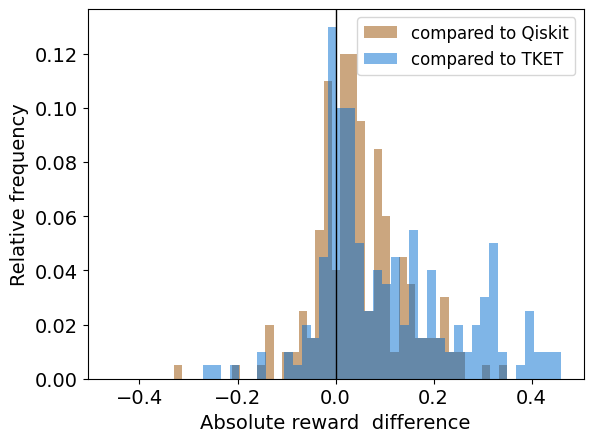

In [12]:
ax = df["RL-Qiskit Fid"].hist(bins=40, alpha=0.5, color=color_qiskit, weights=np.ones(len(df["RL-Qiskit Fid"])) / len(df["RL-Qiskit Fid"]), xlabelsize=size, ylabelsize=size)
df["RL-TKET Fid"].hist(bins=40, ax=ax, alpha=0.5, color=color_TKET, grid=False, weights=np.ones(len(df["RL-TKET Fid"])) / len(df["RL-TKET Fid"]))
ax.set_ylabel("Relative frequency", size=size)
ax.set_xlabel("Absolute reward  difference", size=size)
max_val = max([df["RL-Qiskit Fid"].max(), df["RL-TKET Fid"].max(), -df["RL-Qiskit Fid"].min(), -df["RL-TKET Fid"].min()])
ax.set_xlim(-max_val-(max_val)/10, max_val+(max_val)/10)
ax.legend(["compared to Qiskit", "compared to TKET"], fontsize=legendsize, loc='upper right')
ax.axvline(x=0, color= 'black', linewidth=1).get_figure().savefig('results/fid_hist.pdf', bbox_inches='tight')

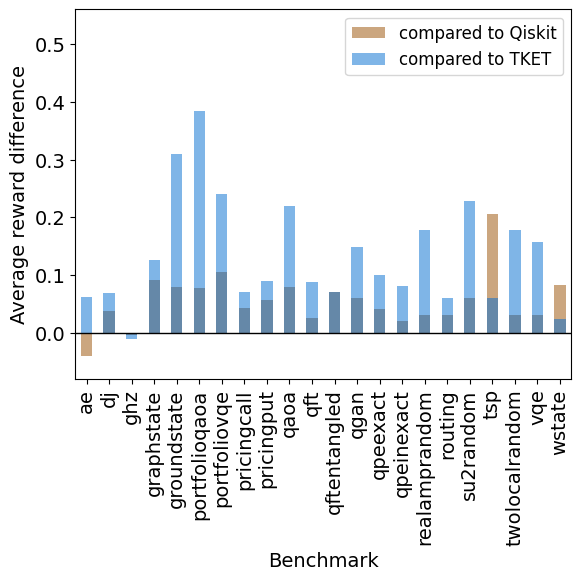

In [13]:
ax = df.groupby(["Benchmark"])["RL-Qiskit Fid"].mean().plot(kind="bar", color=color_qiskit, alpha=0.5)
df.groupby(["Benchmark"])["RL-TKET Fid"].mean().plot(kind="bar", ax=ax, color=color_TKET, alpha=0.5)
ax.set_ylabel("Average reward difference", size=size)
ax.set_xlabel("Benchmark", size=size)
ax.tick_params(axis='x', which='both', labelsize=size)
ax.legend(["compared to Qiskit", "compared to TKET"], fontsize=legendsize, loc='upper right')
ax.set_ylim(min_value_bench-0.01, max_val_bench+0.01)
ax.tick_params(axis='both', labelsize=size)
ax.axhline(y=0, color= 'black', linewidth=1).get_figure().savefig('results/fid_bench.pdf', bbox_inches='tight')

In [14]:
print(df["RL-Qiskit Fid"].mean(), df["RL-TKET Fid"].mean())

0.048049999999999995 0.10594999999999999


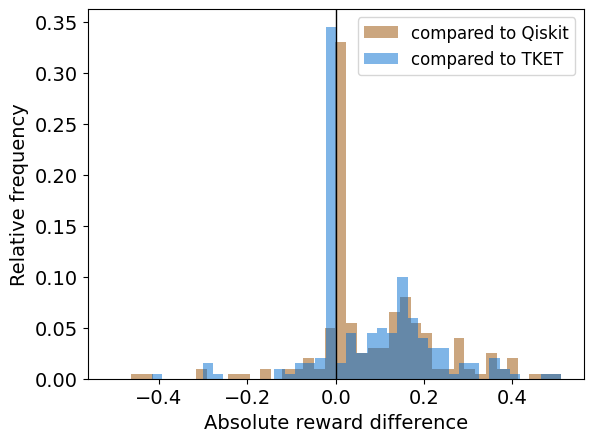

In [15]:
ax = df["RL-Qiskit Parallelism"].hist(bins=40, alpha=0.5, color=color_qiskit, weights=np.ones(len(df["RL-Qiskit Parallelism"])) / len(df["RL-Qiskit Parallelism"]), xlabelsize=size, ylabelsize=size)
df["RL-TKET Parallelism"].hist(bins=40, ax=ax, alpha=0.5, color=color_TKET, grid=False, weights=np.ones(len(df["RL-TKET Parallelism"])) / len(df["RL-TKET Parallelism"]))
ax.set_ylabel("Relative frequency", size=size)
ax.set_xlabel("Absolute reward difference", size=size)
max_val = max([df["RL-Qiskit Parallelism"].max(), df["RL-TKET Parallelism"].max(), -df["RL-Qiskit Parallelism"].min(), -df["RL-TKET Parallelism"].min()])
ax.set_xlim(-max_val-(max_val)/10, max_val+(max_val)/10)
ax.legend(["compared to Qiskit", "compared to TKET"], fontsize=legendsize, loc='upper right')
ax.axvline(x=0, color= 'black', linewidth=1).get_figure().savefig('results/par_hist.pdf', bbox_inches='tight')

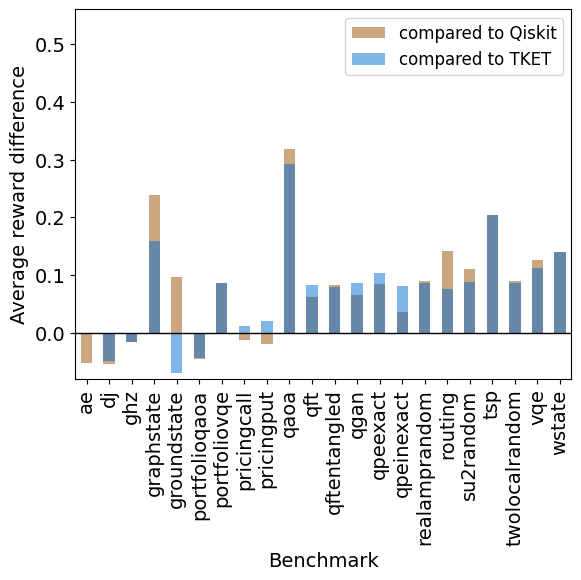

In [16]:
ax = df.groupby(["Benchmark"])["RL-Qiskit Parallelism"].mean().plot(kind="bar", color=color_qiskit, alpha=0.5)
df.groupby(["Benchmark"])["RL-TKET Parallelism"].mean().plot(kind="bar", ax=ax, color=color_TKET, alpha=0.5)
ax.set_ylabel("Average reward difference", size=size)
ax.set_xlabel("Benchmark", size=size)
ax.tick_params(axis='x', which='both', labelsize=size)
ax.set_ylim(min_value_bench-0.01, max_val_bench+0.01)
ax.tick_params(axis='both', labelsize=size)
ax.legend(["compared to Qiskit", "compared to TKET"], fontsize=legendsize, loc='upper right')
ax.axhline(y=0, color= 'black', linewidth=1).get_figure().savefig('results/par_bench.pdf', bbox_inches='tight')

In [17]:
print(df["RL-Qiskit Parallelism"].mean(), df["RL-TKET Parallelism"].mean())

0.08346999173792019 0.0812874606959752


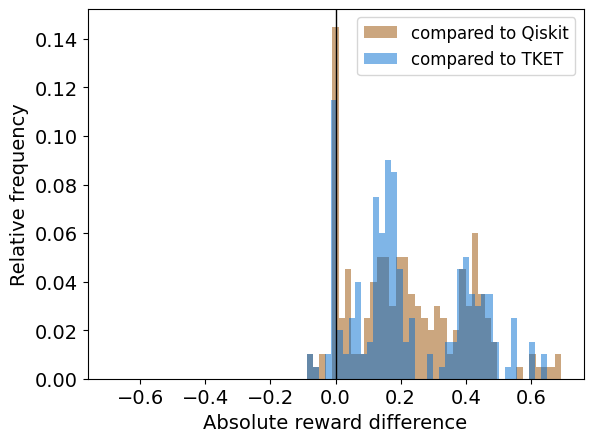

In [18]:
ax = df["RL-Qiskit Crit Depth"].hist(bins=40, alpha=0.5, color=color_qiskit, weights=np.ones(len(df["RL-Qiskit Crit Depth"])) / len(df["RL-Qiskit Crit Depth"]), xlabelsize=size, ylabelsize=size)
df["RL-TKET Crit Depth"].hist(bins=40, ax=ax, alpha=0.5, grid=False, color=color_TKET, weights=np.ones(len(df["RL-TKET Crit Depth"])) / len(df["RL-TKET Crit Depth"]))
ax.set_ylabel("Relative frequency", size=size)
ax.set_xlabel("Absolute reward difference", size=size)
max_val = max([df["RL-Qiskit Crit Depth"].max(), df["RL-TKET Crit Depth"].max(), -df["RL-Qiskit Crit Depth"].min(), -df["RL-TKET Crit Depth"].min()])
ax.set_xlim(-max_val-(max_val)/10, max_val+(max_val)/10)
ax.legend(["compared to Qiskit", "compared to TKET"], fontsize=legendsize, loc='upper right')
ax.axvline(x=0, color= 'black', linewidth=1).get_figure().savefig('results/depth_hist.pdf', bbox_inches='tight')

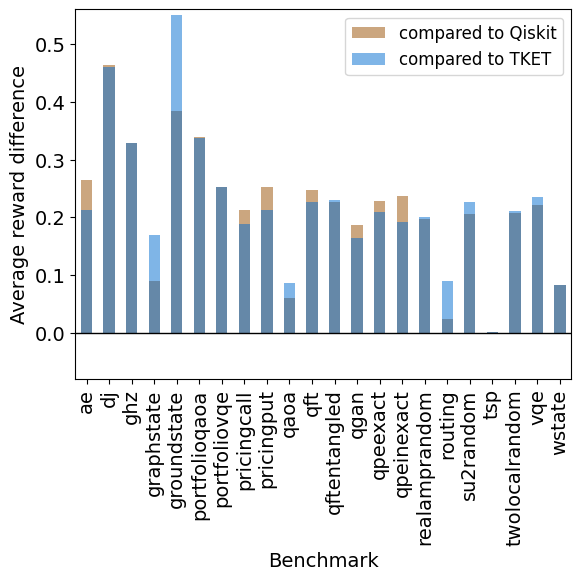

In [19]:
ax = df.groupby(["Benchmark"])["RL-Qiskit Crit Depth"].mean().plot(kind="bar", color=color_qiskit, alpha=0.5)
df.groupby(["Benchmark"])["RL-TKET Crit Depth"].mean().plot(kind="bar", ax=ax, color=color_TKET, alpha=0.5)
ax.set_ylabel("Average reward difference", size=size)
ax.set_xlabel("Benchmark", size=size)
ax.tick_params(axis='x', which='both', labelsize=size)
ax.set_ylim(min_value_bench-0.01, max_val_bench+0.01)
ax.tick_params(axis='both', labelsize=size)
ax.legend(["compared to Qiskit", "compared to TKET"], fontsize=legendsize, loc='upper right')
ax.axhline(y=0, color= 'black', linewidth=1).get_figure().savefig('results/depth_bench.pdf', bbox_inches='tight')

In [20]:
print(df["RL-Qiskit Crit Depth"].mean(), df["RL-TKET Crit Depth"].mean())

0.2211300082620798 0.22331253930402484


# Comparing Execution Time (Run Time)

In [21]:
df[["Qiskit O3 Time", "TKET Time", "RL Fid Time", "RL Parallelism Time", "RL Crit Depth Time",]]

,Qiskit O3 Time,TKET Time,RL Fid Time,RL Parallelism Time,RL Crit Depth Time
56,0.59,2.64,1.45,2.45,3.11
89,0.58,2.79,7.10,1.60,11.97
20,1.58,2.76,6.37,1.48,11.74
28,1.01,2.90,8.87,1.90,14.78
163,0.54,2.96,9.60,1.31,3.94
...,...,...,...,...,...
58,1.93,2.85,17.59,4.98,6.53
88,3.36,3.68,7.39,5.67,8.28
114,1.69,2.95,10.33,7.19,8.54
127,4.70,3.06,15.48,5.51,8.14


In [22]:
(df["RL Fid Time"]/df["Qiskit O3 Time"]).mean()

13.587383175990272

# 3x3 Matrix With Mean Result and RL Optimization Criterion

In [23]:
RL_fid = [df["RL Fid"].mean(), df["RL Fid Parallelism"].mean(), df["RL Fid Crit Depth"].mean()]
RL_par = [df["RL Parallelism Fid"].mean(),df["RL Parallelism"].mean(),df["RL Parallelism Crit Depth"].mean()]
RL_dep = [ df["RL Crit Depth Fid"].mean(),df["RL Crit Depth Parallelism"].mean(), df["RL Crit Depth"].mean()]

In [24]:
print(np.round(RL_fid,2))
print(np.round(RL_par,2))
print(np.round(RL_dep,2))

[0.48 0.73 0.27]
[0.27 0.84 0.16]
[0.18 0.53 0.47]
